In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [72]:
#creating mesh
x=30
y=x/3
#number of mesh in x direction
N=60
time=30 #sec
q=10         #heat source
k_f=1        #thermal_conductivity_fuel
rho=0.1
Cp=0.56

dt=0.01


#BCs
T_left=18
T_right=18
T_up=18
T_down=150

dx=x/N
dy=dx

x_pos=np.arange(0,x,dx)
y_pos=np.arange(0,y,dy)
t=np.arange(0,time,dt)

In [73]:
Nx=N               #number of mesh in x direction
Ny=len(y_pos)      #number of mesh in y direction
N_time=len(t)   #number of time step

Temp=np.ones((Nx+1,Ny+1,N_time+2))*15 #T(x,y,t)
Temp[0,:,:]=T_left
Temp[-1,:,:]=T_right
Temp[:,0,:]=T_down
Temp[:,-1,:]=T_up


the main equation in 2D is $$\rho \frac{C_p}{k} \frac{dT}{dt}=\frac{d^2T}{dx^2}+\frac{d^2T}{dy^2}+\frac{q}{k}$$
after discretization the equation becomes $$\rho \frac{C_p}{k}\frac{(T^{n+1}_{i,j}-T^n_{i,j})}{Δt}=\frac{T^n_{i+1,j}-2T^n_{i,j}+T^n_{i-1,j}}{Δx^2}+\frac{T^n_{i,j+1}-2T^n_{i,j}+T^n_{i,j-1}}{Δy^2}+\frac{q}{k}$$

or

$$T^{n+1}_{i,j}=\frac{kΔt}{ρC_p}(\frac{T^n_{i+1,j}-2T^n_{i,j}+T^n_{i-1,j}}{Δx^2}+\frac{T^n_{i,j+1}-2T^n_{i,j}+T^n_{i,j-1}}{Δy^2}+\frac{q}{k})+T^{n}_{i,j}$$

according to the problem $\frac{k}{ρC_p}=1 $ and no heat generation so $\frac{q}{k}=0$ and it reduces to :
$$T^{n+1}_{i,j}=(\frac{T^n_{i+1,j}-2T^n_{i,j}+T^n_{i-1,j}}{Δx^2}+\frac{T^n_{i,j+1}-2T^n_{i,j}+T^n_{i,j-1}}{Δy^2})Δt+T^{n}_{i,j}$$
$$BCs:$$
$$T(0,y,t)=T(3b,y,t)=18°C$$
$$T(x,0,t)=150°C$$$$T(x,b,t)=18°C$$


In [74]:
for time_step in range (0,N_time):
  for i in range (1,Nx):
    for j in range (1,Ny):
      Temp[i,j,time_step+1]=Temp[i,j,time_step]+(dt*(Temp[i+1,j,time_step]-4*Temp[i,j,time_step]+Temp[i-1,j,time_step]+Temp[i,j+1,time_step]+Temp[i,j-1,time_step]))/dx**2


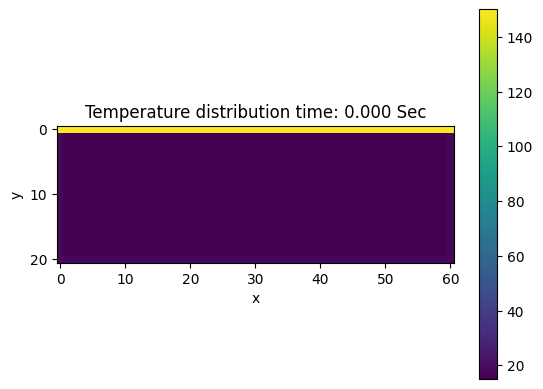

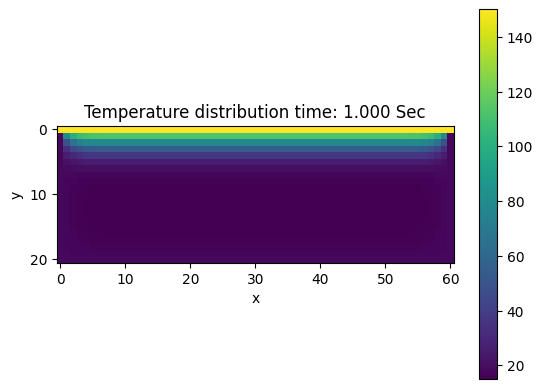

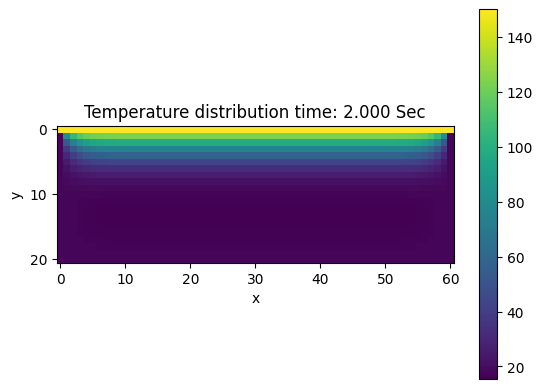

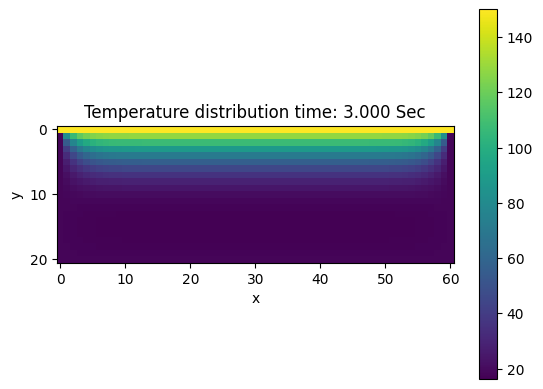

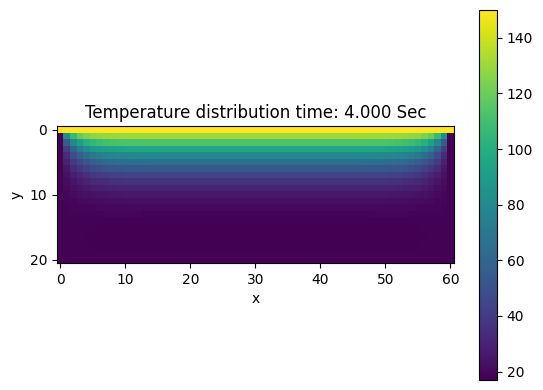

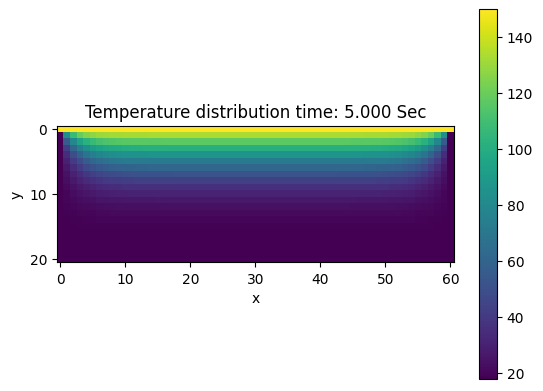

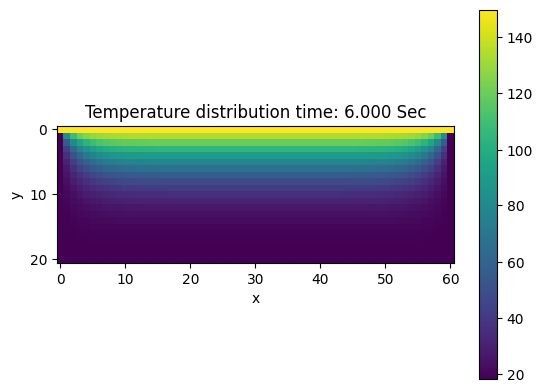

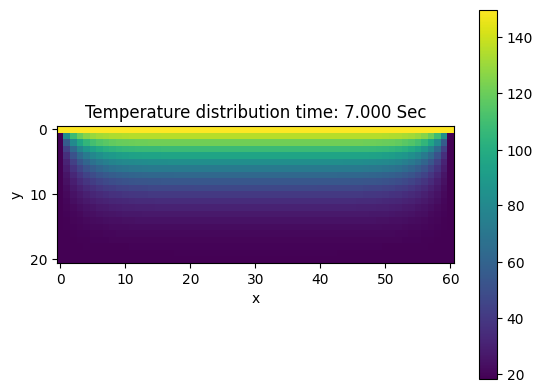

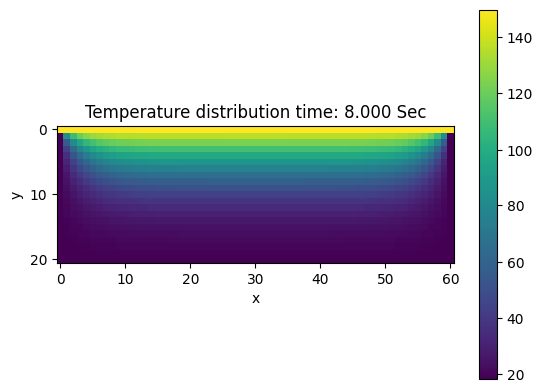

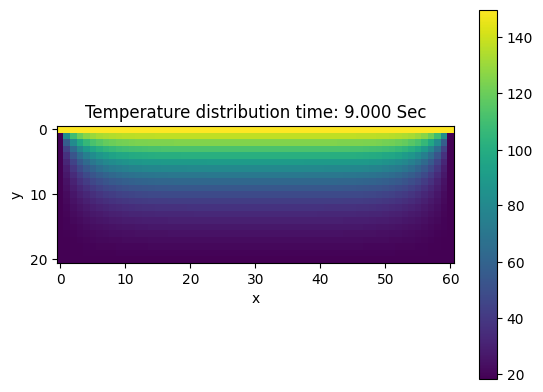

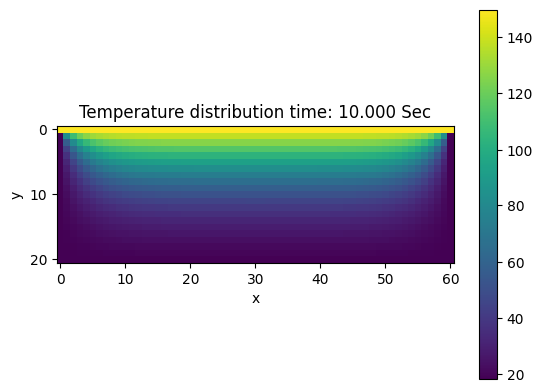

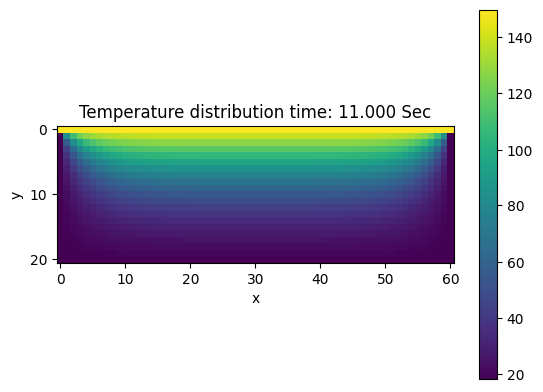

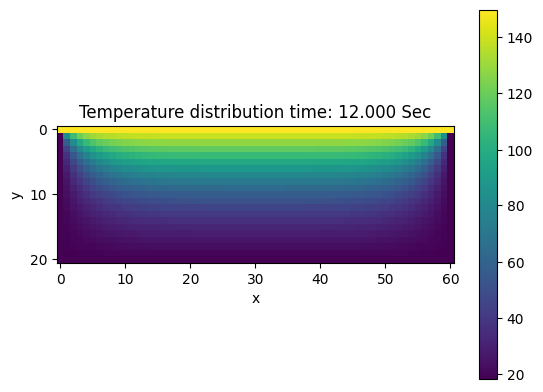

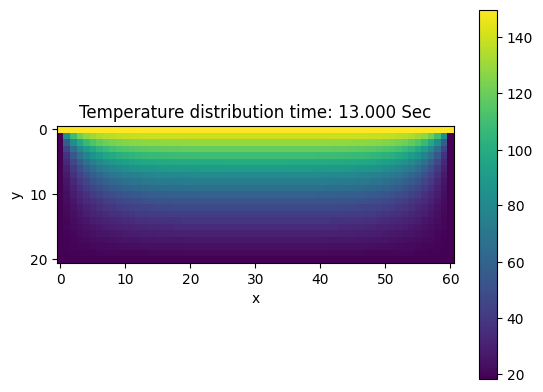

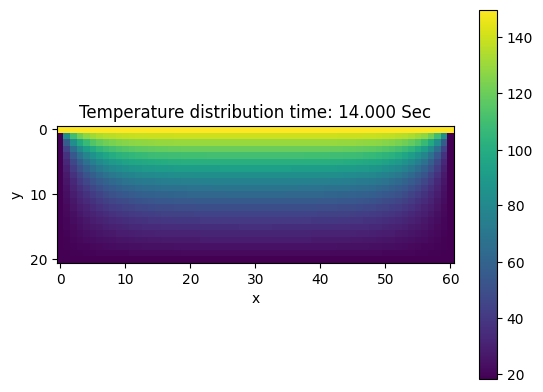

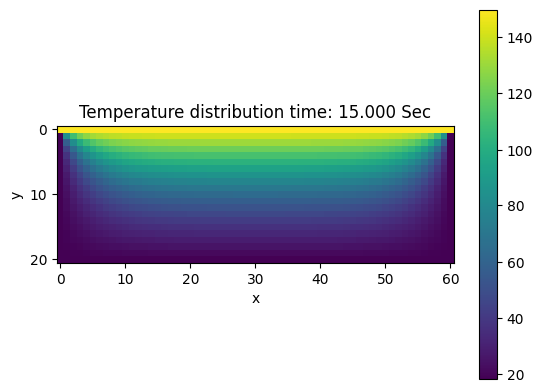

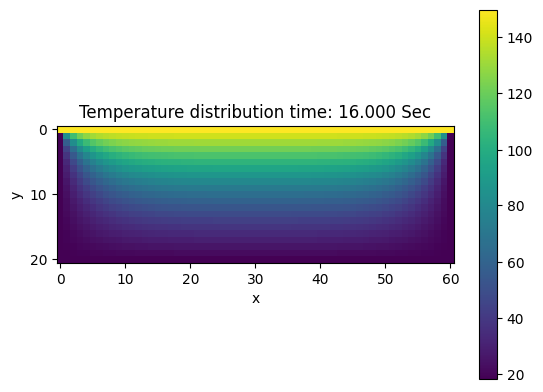

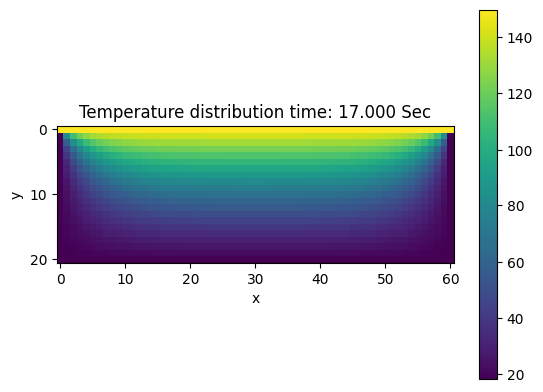

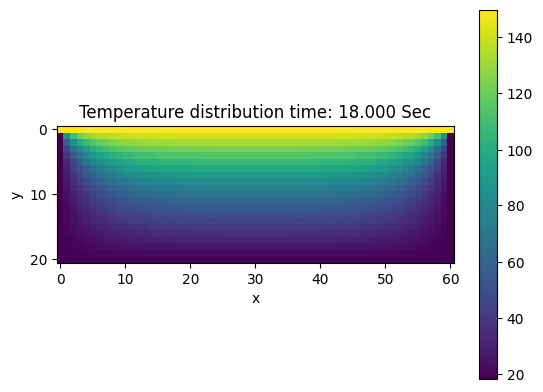

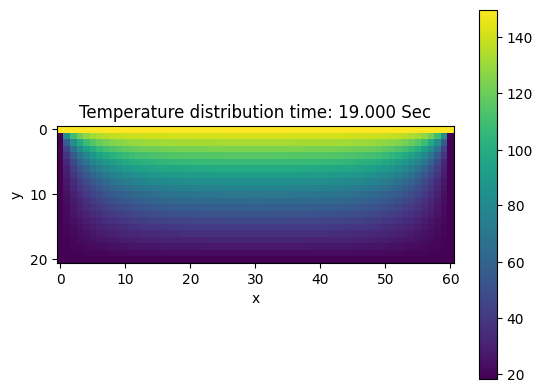

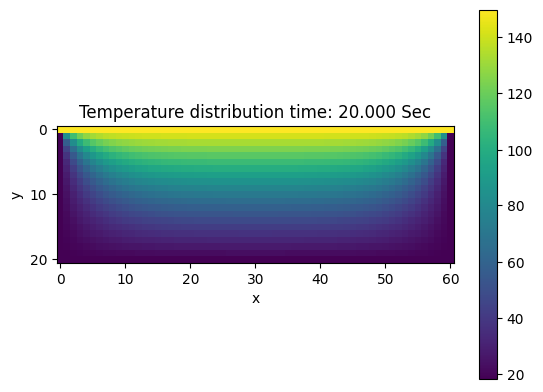

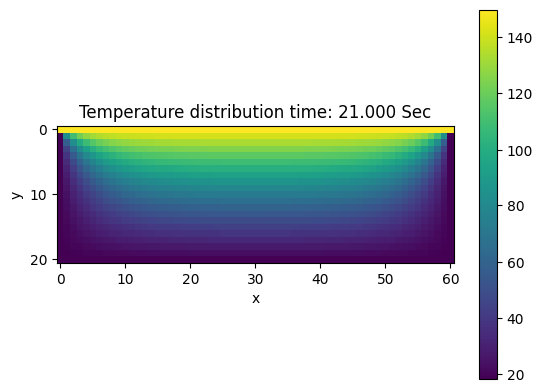

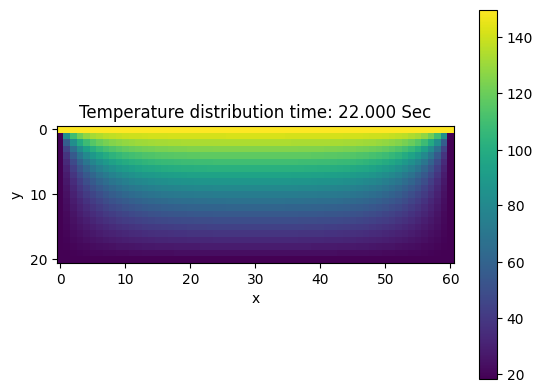

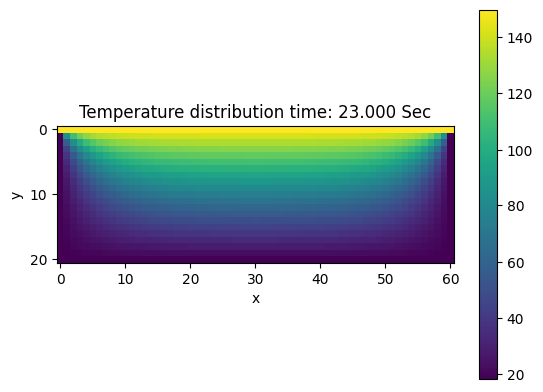

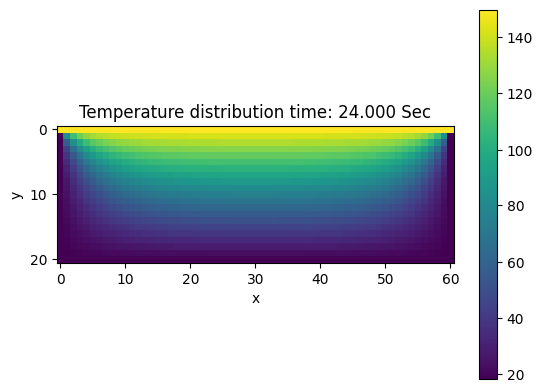

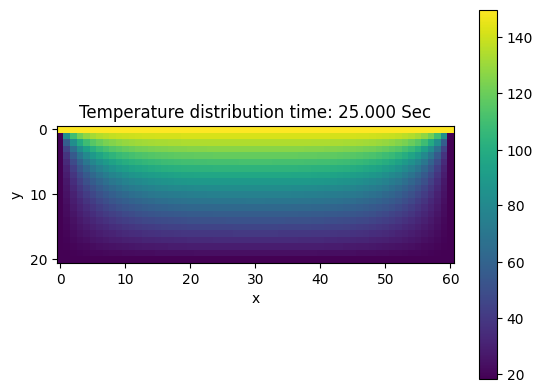

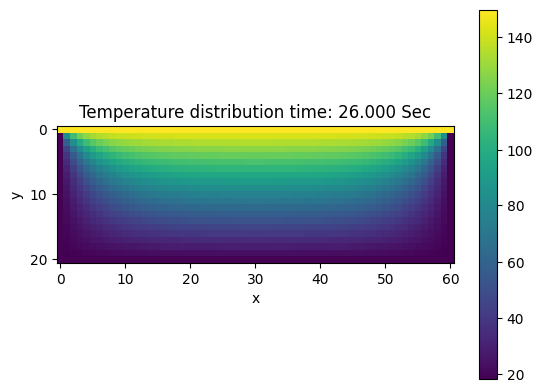

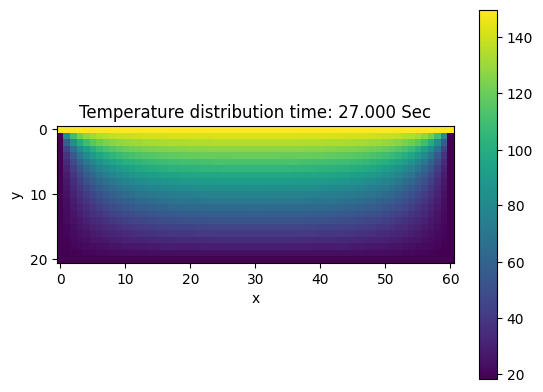

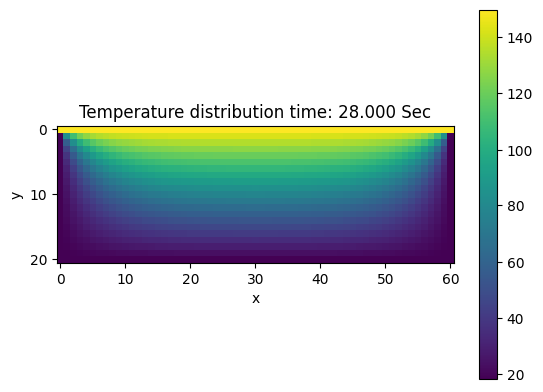

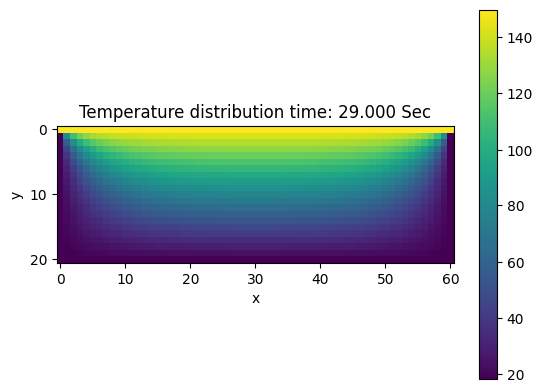

In [75]:
for i in range(N_time):
  if (i%100==0):
    plt.imshow(Temp[:,:,i].T,cmap='viridis')
    plt.colorbar()
    plt.title("Temperature distribution time: "+str('%.3f'% t[i])+' Sec')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [76]:
len(x_pos),len(y_pos)

(60, 20)

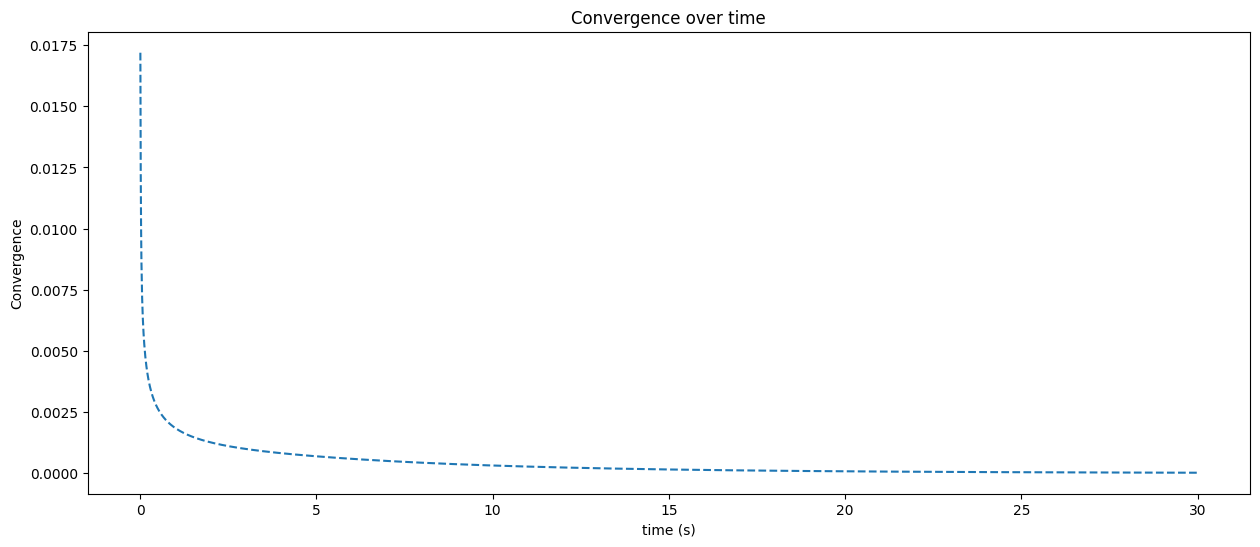

In [81]:
error=np.zeros(N_time)
for i in range(N_time):
    error[i]=np.mean(np.abs((Temp[:,:,i].T-Temp[:,:,i-1].T)/Temp[:,:,i-1].T))
plt.figure(figsize=(15,6))
plt.plot(t[1:],error[1:],'--')
plt.title("Convergence over time")
plt.xlabel('time (s)')
plt.ylabel('Convergence')
plt.show()